In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display_html
import scipy.stats as stats

Нашла в интернете функцию для расположения таблиц на одной горизонтали:

In [2]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
rating = pd.read_csv('/datasets/rating.csv')

# Подготовка данных

In [4]:
#del rating['Unnamed: 0']
rating.info()
rating

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
rating_type    8 non-null object
decryption     8 non-null object
dtypes: object(2)
memory usage: 256.0+ bytes


,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [5]:
data = pd.read_csv('/datasets/games_data.csv')

In [6]:
#del data['Unnamed: 0']

In [7]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 9 columns):
platform        4026 non-null object
sales_year      4026 non-null float64
genre           4026 non-null object
online          4026 non-null float64
offline         4026 non-null float64
critic_score    1812 non-null float64
user_score      2382 non-null object
rating          2315 non-null object
game_id         4026 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 283.2+ KB


,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id
0,PS3,2017.0,Action,702.0,909.0,97.0,8.2,M,20838
1,X360,2017.0,Action,966.0,514.0,97.0,8.1,M,48673
2,X360,2017.0,Shooter,904.0,424.0,88.0,3.4,M,17801
3,PS4,2015.0,Shooter,603.0,586.0,NaN,NaN,NaN,12200
4,3DS,2017.0,Role-Playing,528.0,419.0,NaN,NaN,NaN,11432


In [8]:
data.duplicated().sum()

0

In [9]:
data['platform'].value_counts()

PS3     708
3DS     512
X360    498
PSV     431
PS4     393
PC      389
PSP     312
XOne    247
Wii     197
DS      185
WiiU    147
PS2       7
Name: platform, dtype: int64

In [10]:
data['sales_year'] = data['sales_year'].astype('int')

In [11]:
data['genre'].value_counts()

Action          1270
Role-Playing     467
Adventure        410
Sports           389
Misc             375
Shooter          329
Racing           180
Fighting         159
Simulation       137
Platform         122
Strategy         117
Puzzle            71
Name: genre, dtype: int64

In [12]:
data['online'] = data['online'].astype('int')

In [13]:
data['offline'] = data['offline'].astype('int')

In [14]:
data['total_sales'] = data['online'] + data['offline']

In [15]:
data['critic_score'].min()

13.0

In [16]:
data['user_score'].unique()

array(['8.2', '8.1', '3.4', nan, '5.3', '4.8', '3.2', '8.3', '8.4', '2.6',
       '7.8', '7.2', '7', '8.7', '4.3', '6.6', '5.7', '5', '7.4', '7.5',
       '6.5', '9.1', '7.3', '6.9', '6.4', '6.1', '8.6', '7.9', '6.7',
       '5.4', '4', '8.5', '9', '4.9', '4.5', '6.2', '4.2', '6.3', '7.7',
       '9.2', '7.6', '8', '3.7', '4.1', '5.8', '5.6', '6.8', '5.5', '4.4',
       '5.9', '8.9', '3.9', 'tbd', '3.1', '2.9', '6', '4.7', '7.1', '8.8',
       '5.1', '3.5', '2.5', '3', '2.7', '2.2', '5.2', '1.8', '3.8', '3.3',
       '4.6', '9.3', '1.6', '3.6', '2.4', '2.8', '1.7', '2.1', '2', '1.5',
       '0.7', '0.2', '1.2', '0.9', '1.9', '1.3', '1', '1.4', '2.3'],
      dtype=object)

Рейтинг пользователей, в отличие от рейтинга критиков, представлен строкой. Для удобства работы его следует преобразовать в float. "TBD" означает, что рейтинг будет сформирован позднее, то есть сейчас его нет, так что вполне логично заменить его на NaN.

In [17]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [18]:
data['user_score'].min()

0.2

In [19]:
data.query('critic_score == "NaN" and user_score == "NaN"').head()

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,total_sales
3,PS4,2015,Shooter,603,586,NaN,NaN,NaN,12200,1189
4,3DS,2017,Role-Playing,528,419,NaN,NaN,NaN,11432,947
10,3DS,2018,Role-Playing,435,349,NaN,NaN,NaN,32194,784
17,X360,2017,Misc,570,265,NaN,NaN,NaN,19166,835
22,DS,2018,Role-Playing,279,172,NaN,NaN,NaN,19252,451


В таблице около 2 тысяч записей (почти половина) без оценок пользователей и критиков, но мы видим, что некоторые из этих игр были проданы, так что не будем исключать их из анализа.

In [20]:
data['rating'].value_counts(dropna=False)

NaN     1711
M        622
E        619
T        616
E10+     456
EC         1
RP         1
Name: rating, dtype: int64

In [21]:
data.pivot_table(index='genre', columns='rating', values='game_id', aggfunc='count')

rating,E,E10+,EC,M,RP,T
genre,,,,,,
Action,90.0,188.0,1.0,255.0,NaN,191.0
Adventure,9.0,26.0,NaN,40.0,NaN,23.0
Fighting,NaN,5.0,NaN,17.0,NaN,87.0
Misc,71.0,75.0,NaN,5.0,NaN,43.0
Platform,45.0,51.0,NaN,NaN,NaN,6.0
Puzzle,30.0,10.0,NaN,NaN,NaN,2.0
Racing,94.0,21.0,NaN,3.0,NaN,18.0
Role-Playing,5.0,17.0,NaN,81.0,NaN,108.0
Shooter,1.0,25.0,NaN,212.0,NaN,44.0


В столбце "рейтинг" тоже много пропусков, более 40%. Создав сводную таблицу по жанрам я надеялась отследить жанры, для которых может быть только один рейтинг, чтобы присвоить этот рейтинг другим играм того же жанра, но сводная таблица не позволяет сделать таких выводов.

### Проблема повторяющихся игр
Есть ряд игр, которые повторяются в разные годы, причем у них могут быть одинаковые или разные платформы, год выпуска, жанр и рейтинг.

Я предполагаю, что _игры могут выпускаться для разных платформ_, допускаю, что _одной и той же игре может быть присвоен разный жанр_ (так как это не четкая категории), но полагаю, что __если для игры совпадает год продаж и платформа, то это ошибка в данных__, и такие строки стоит удалить, причем обе, так как выбрать между двумя строками затруднительно.

In [22]:
data = data.drop_duplicates(subset=['platform', 'sales_year', 'game_id'], keep=False).reset_index(drop=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4010 entries, 0 to 4009
Data columns (total 10 columns):
platform        4010 non-null object
sales_year      4010 non-null int64
genre           4010 non-null object
online          4010 non-null int64
offline         4010 non-null int64
critic_score    1804 non-null float64
user_score      2022 non-null float64
rating          2305 non-null object
game_id         4010 non-null int64
total_sales     4010 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 313.4+ KB


Также __выглядят подозрительно игры с разным рейтингом ESRB__, их я тоже считаю нужным удалить, так как невозможно определить, какой рейтинг верный. Для этого я посмотрю, какие игры повторяются:

In [24]:
repeated = data['game_id'].value_counts().reset_index()

In [25]:
repeated.columns = ['game_id', 'qty']

In [26]:
data = data.merge(repeated, on='game_id', how='left')

Далее я обработаю рейтинги повторяющихся игр: удалю пустые значения и проверю, у скольких игр есть более одного рейтинга:

In [27]:
game_rating = data[data['qty'] > 1].loc[:, ['rating', 'game_id']]

In [28]:
game_rating = game_rating.dropna() 

In [29]:
rating_false = game_rating['game_id'].value_counts().reset_index() #у каких игр более одного рейтинга

In [30]:
rating_false.columns = ['game_id', 'repeated']

In [31]:
game_rating = game_rating.merge(rating_false, on='game_id', how='left') 
#добавленный столбец указывает, у каких игр более одного рейтинга

In [32]:
game_rating = game_rating.rename(columns={'rating':'true_rating'})
game_rating = game_rating.drop_duplicates(subset='game_id') 
#удаляем повторяющиеся игры, потому что затем мы добавим эти данные в основную таблицу
#нам нужны будут только уникальные id игр для слияния. Столбец repeated укажет на наличие более одного рейтинга
game_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 212
Data columns (total 3 columns):
true_rating    151 non-null object
game_id        151 non-null int64
repeated       151 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.7+ KB


In [33]:
data = data.merge(game_rating, on='game_id', how='left')
data['repeated'] = data['repeated'].fillna(0)

In [34]:
data = data[data['repeated'] < 2] #удаляем игры, у которых более одного рейтинга

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3887 entries, 0 to 4009
Data columns (total 13 columns):
platform        3887 non-null object
sales_year      3887 non-null int64
genre           3887 non-null object
online          3887 non-null int64
offline         3887 non-null int64
critic_score    1711 non-null float64
user_score      1915 non-null float64
rating          2182 non-null object
game_id         3887 non-null int64
total_sales     3887 non-null int64
qty             3887 non-null int64
true_rating     182 non-null object
repeated        3887 non-null float64
dtypes: float64(3), int64(6), object(4)
memory usage: 425.1+ KB


In [36]:
data['rating'] = data['rating'].fillna(data['true_rating'])
#заполняем рейтинг игр, которые представляены более чем одной строкой, 
#причем в одной из них есть рейтинг, а в другой / других - пустые значения

In [37]:
data.drop(['qty', 'true_rating', 'repeated'], axis='columns', inplace=True)

# Исследовательский анализ данных

###  Распределение количества игр по годам продажи

In [38]:
games_x_year = data.groupby('sales_year', as_index=False).agg({'game_id':'count'})

In [39]:
games_x_year

,sales_year,game_id
0,2015,583
1,2016,489
2,2017,1629
3,2018,1186


<function matplotlib.pyplot.show(*args, **kw)>

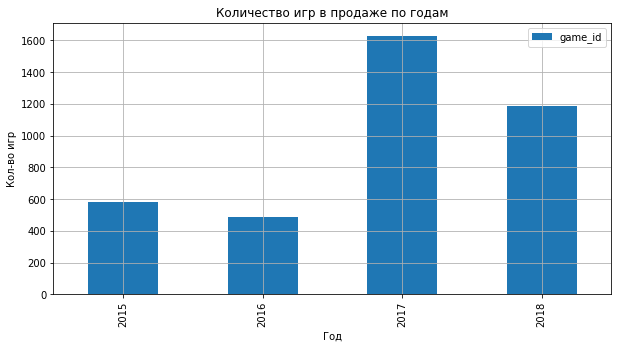

In [40]:
games_x_year.plot(x='sales_year', y='game_id', kind='bar', figsize=(10,5), grid=True, title='Количество игр в продаже по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.show

Мы видим, что количество игр в продаже выросло в два раза с 2015-го по 2018-й год, но рост происходил неравномерно: он снизился примерно на 16% в 2016-м году, затем вырос более чем в три раза (все время сравниваем с предыдущим годом), а затем опять снизился на 27%.

### Продажи игр с отзывами / без отзывов

In [41]:
data['score'] = 'есть_отзывы'

In [42]:
data.loc[data['user_score'].isnull() & data['critic_score'].isnull(), 'score'] = 'нет_отзывов'

In [43]:
scores_years = data.pivot_table(
    index='sales_year', columns='score', values='game_id', aggfunc='count')

In [44]:
scores_years.columns = ['есть_отзывы', 'нет_отзывов']

Text(0, 0.5, 'Продажи, 100 тыс.')

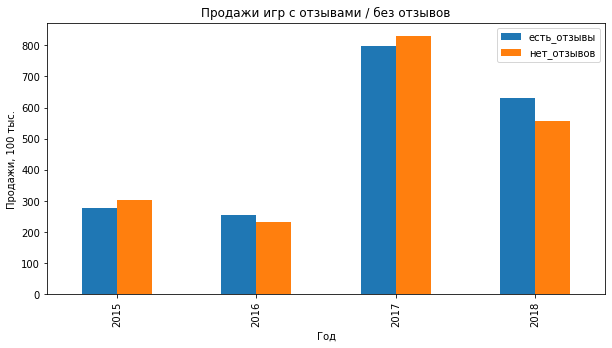

In [45]:
scores_years.plot(kind='bar', figsize=(10, 5), title='Продажи игр с отзывами / без отзывов')
plt.xlabel('Год')
plt.ylabel('Продажи, 100 тыс.')

Мы видим, что наличие оценки не оказывают существенного влиянми на объем продаж игр, видимо, на успешность игры влияют другие факторы.

### График по суммам продаж каждого года

In [46]:
data_years = data.groupby('sales_year', as_index=False).agg({'online':'sum', 'offline':'sum', 'total_sales':'sum'})

In [47]:
data_years['online'] = data_years['online']/10
data_years['offline'] = data_years['offline']/10
data_years['total_sales'] = data_years['total_sales']/10

In [48]:
data_years

,sales_year,online,offline,total_sales
0,2015,975.8,911.0,1886.8
1,2016,430.5,487.8,918.3
2,2017,3791.2,2743.3,6534.5
3,2018,2701.7,2155.9,4857.6


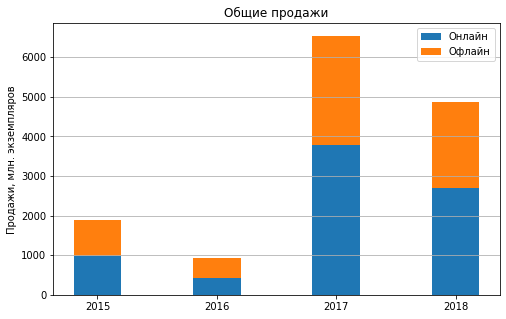

In [49]:
N = 4
ind = np.arange(N) 
width = 0.4      

plt.figure(figsize=(8,5))
p1 = plt.bar(ind, data_years['online'], width)
p2 = plt.bar(ind, data_years['offline'], width,
             bottom = data_years['online'])


plt.ylabel('Продажи, млн. экземпляров')
plt.title('Общие продажи')
plt.grid(axis='y')
plt.xticks(ind, ('2015', '2016', '2017', '2018'))
plt.yticks(np.arange(0, 7000, 1000))
plt.legend((p1[0], p2[0]), ('Онлайн', 'Офлайн'))

plt.show()

Исходя из графика рост продаж игр увеличился с 2015-го по 2018-й год (годы, по которым есть данные), но рост очень неровный, чередуется с падениями и, видимо, связан с количеством игр в продаже.


Во все годы, кроме 2016-го, продажи игр онлайн превышали продажи офлайн.

### Диаграмма размаха по общим продажам игр

In [50]:
game_id_sales = data.groupby('game_id', as_index=False).agg({'total_sales':'sum'})

In [51]:
len(game_id_sales.index)

3769

Text(0.5, 1.0, 'Диаграмма размаха продаж игр')

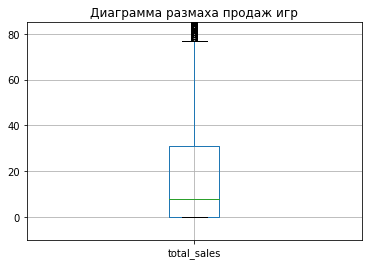

In [52]:
plt.ylim(-10, 85)
game_id_sales.boxplot('total_sales')
plt.title('Диаграмма размаха продаж игр')

In [53]:
game_id_sales['total_sales'].describe().round(2)

count    3769.00
mean       37.67
std       100.47
min         0.00
25%         0.00
50%         8.00
75%        31.00
max      1611.00
Name: total_sales, dtype: float64

Всего за рассматриваемые годы было продано 3769 игр. В среднем было продано 32 экземпляр каждой игры, но медиана списка значений составляет 8 продаж. Это не удивительно: продажи половины игр лежат в диапазоне от 0 до 8, 25% игр вообще не продавались ни разу. С другой стороны, величина продаж 16% игр превышают полтора межквартильных размах (77,5).


Если же нас интересует распределение продаж только по играм, которые продавались хотя бы раз, имеет смысл исключить из анализа игры, которые не были проданы ни разу.

In [54]:
game_id_sales = game_id_sales.query('total_sales > 0')

Text(0.5, 1.0, 'Диаграмма размаха продаж игр без нулевых значений продаж')

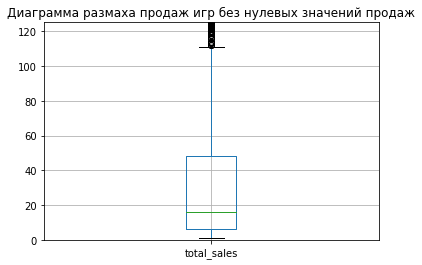

In [55]:
plt.ylim(0, 125)
game_id_sales.boxplot('total_sales')
plt.title('Диаграмма размаха продаж игр без нулевых значений продаж')

In [56]:
game_id_sales['total_sales'].describe()

count    2755.000000
mean       51.532486
std       114.438784
min         1.000000
25%         6.000000
50%        16.000000
75%        48.000000
max      1611.000000
Name: total_sales, dtype: float64

Диаграмма размаха и метрики локации изменились, но мы также видим, что среднее существенно больше медианы, что четвертая часть игр продавалась не более 6 раз, но есть несколько игр, продажи которых сильно превышают средние значения.

### На какой платформе было продано больше всего игр

In [57]:
data.groupby('platform', as_index=False).agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head()

,platform,total_sales
10,X360,32920
4,PS3,32420
5,PS4,21325
0,3DS,14102
11,XOne,13938


__Лидер по продажам среди платформ - X360__, там было продано более 32920 сотен тысяч игр. __PS3 почти также популярна__: здесь продано 32420 сотен тысячи игр, всего лишь на 1,5% меньше, чем на X360.

На втором месте - PS4 с 21325 сотнями тысяч продаж, а третье делят XOne и 3DS, на каждой из которых продано около 14000 сотен тысяч игр.

### Самый популярный жанр игр

In [58]:
data.groupby('genre').agg({'game_id':'count'}).sort_values(by='game_id', ascending=False)

,game_id
genre,
Action,1226
Role-Playing,458
Adventure,407
Sports,369
Misc,364
Shooter,317
Racing,168
Fighting,150
Simulation,134


Все игры относятся к одному из 12 жанров.

__Наиболее часто встречающийся жанр - action__, к нему относятся более 30% игр. Другие популярные жанры: role-playing, adventure, sports, но к каждому из них относятся 9-12% игр. Стоит отметить, что деление на жанры весьма условно. Некоторые игры на разных платформах отнесены к разным жанрам.

### Игры с экстремальными оценками пользователей и критиков

In [59]:
print('Оценки пользователей (из 10): минимальная -', data['user_score'].min(),', максимальная -', data['user_score'].max())

Оценки пользователей (из 10): минимальная - 0.2 , максимальная - 9.3


In [60]:
data.query('user_score == 0.2 or user_score == 9.3')

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,total_sales,score
638,PC,2015,Role-Playing,21,46,93.0,9.3,M,12365,67,есть_отзывы
2106,PS3,2016,Sports,7,2,NaN,0.2,E,23493,9,есть_отзывы
2336,PSV,2015,Adventure,0,3,86.0,9.3,M,38270,3,есть_отзывы


Максимальную оценку пользователей получили две игры с рейтингом "+17". Одна из них, "12365", показывает высокие продажи по сравнению со средним уровнем, но не дотягивает до лидеров. Вторая продавала очень мало.

Минимальную оценку пользователей получила игра с рейтингом "для всех" жанра "sports".

In [61]:
print('Оценки критиков (из 100): минимальня -', data['critic_score'].min(),', максимальная -' ,data['critic_score'].max())

Оценки критиков (из 100): минимальня - 19.0 , максимальная - 97.0


In [62]:
data.query('critic_score == 19 or critic_score == 97')

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,total_sales,score
0,PS3,2017,Action,702,909,97.0,8.2,M,20838,1611,есть_отзывы
1,X360,2017,Action,966,514,97.0,8.1,M,48673,1480,есть_отзывы
44,XOne,2018,Action,281,219,97.0,7.9,M,39055,500,есть_отзывы
2115,PS4,2015,Sports,4,6,19.0,3.4,E,12797,10,есть_отзывы
2797,X360,2017,Racing,4,1,19.0,1.3,M,11902,5,есть_отзывы


Максимальную оценку критиков, 97 баллов, получили 3 разных игры. Они продавались на разных платформах, все относятся к жанру "action", у всех рейтинг "+17", а продажи существенно превышают средние.

Игры с минимальной оценкой критиков показали низкие продажи.

__Корреляция оценок критиков и пользователей__

Будем использовать только строки, где есть как оценки пользователей, так и оценки критиков.

In [63]:
score = data.dropna(subset=['critic_score', 'user_score'])
critic_score = score['critic_score']
user_score = score['user_score']

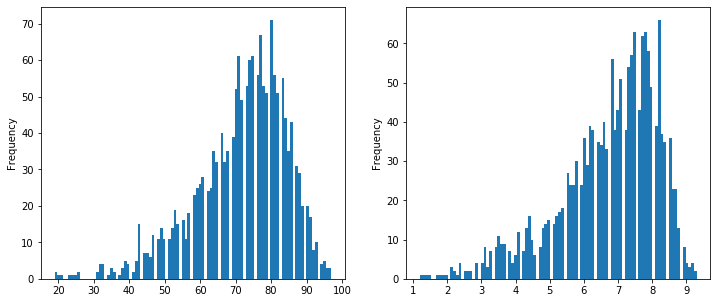

In [64]:
plt.subplot(121)
critic_score.plot(kind='hist', bins=100, figsize=(12,5))
plt.subplot(122)
user_score.plot(kind='hist', bins=100)

Я построила графики плотности оценок, и на вид они не совпадают с нормальным распределением. 

In [65]:
critic_score.corr(user_score, method='spearman')

0.47658898674396594

Полученное значение указывает на __умеренную тесноту связи__ между оценками критиков и оценками пользователей.

## Портрет пользователя для онлайн и офлайн продаж

__Топ-5 предпочтительных жанров__

In [66]:
genre_preffered = data.groupby('genre').agg({'online':'sum', 'offline':'sum'}).reset_index()

In [67]:
genre_preffered_online = genre_preffered.sort_values(by='online', ascending=False).head().loc[:,['genre', 'online']]

In [68]:
genre_preffered_offline = genre_preffered.sort_values(by='offline', ascending=False).head().loc[:,['genre', 'offline']]

In [69]:
display_side_by_side(genre_preffered_online, genre_preffered_offline)

,genre,online
0,Action,21673
8,Shooter,18769
10,Sports,10044
7,Role-Playing,8237
3,Misc,6772
,genre,offline
0,Action,18187
8,Shooter,14280
10,Sports,7882
7,Role-Playing,6131


Сравнение таблиц с топ-жанрами онлайн- и офлайн-продаж демонстрирует, что четверка самых популярных жанров одинакова у всех покупателей, а продажи онлайн во всех жанрах превышают продажи офлайн.

__Год максимальных продаж онлайн и офлайн__

In [70]:
sales_years = data.groupby('sales_year').agg({'online':'sum', 'offline':'sum'}).reset_index()

In [71]:
max_online = sales_years['online'].max()
max_year_online = sales_years[sales_years['online'] == max_online].iloc[0]['sales_year']
print('Максимальное количество игр онлайн:', max_online/10, 'млн., - было продано в', max_year_online, 'году.')

Максимальное количество игр онлайн: 3791.2 млн., - было продано в 2017 году.


In [72]:
max_offline = sales_years['offline'].max()
max_year_offline = sales_years[sales_years['offline'] == max_offline].iloc[0]['sales_year']
print('Максимальное количество игр офлайн:', max_offline/10, 'млн., было продано в', max_year_offline, 'году.')

Максимальное количество игр офлайн: 2743.3 млн., было продано в 2017 году.


Наибольшее количество игр как онлайн, так и офлайн, было продано в 2017-м году, когда ассортимент был максимально широк.

__Топ-5 предпочтительных платформ__, то есть для каких платформ было приобретено больше всего игр онлайн и оффлайн.

In [73]:
platform_preffered = data.groupby('platform').agg({'online':'sum', 'offline':'sum'}).reset_index()

In [74]:
platform_preffered_online = platform_preffered.sort_values(by='online', ascending=False).head().loc[:, ['platform', 'online']]

In [75]:
platform_preffered_offline = platform_preffered.sort_values(by='offline', ascending=False).head().loc[:,['platform', 'offline']]

In [76]:
display_side_by_side(platform_preffered_online, platform_preffered_offline)

,platform,online
10,X360,21730
4,PS3,16470
5,PS4,9447
11,XOne,8933
0,3DS,8087
,platform,offline
4,PS3,15950
5,PS4,11878
10,X360,11190
0,3DS,6015


Если рассматривать продажи онлайн и оффлайн в разрезе платформ, то здесь мы видим интересные отличия. Самой популярной платформой для онлайн-покупателей стала Х360, здесь продажи более чем на 30% выше, чем для следующей в рейтинге PS3. Интересно, что лидером офлайн-продаж является та же платформа PS3, и продажи игр для нее сопоставимы офлайн и онлайн. За PS3 в обоих рейтингах следуют PS4, опять же, с сопоставимыми цифрами продаж.

__Какой рейтинг ESRB встречается чаще всего__

Так как некоторые игры у нас повторяются в списке, следует посчитать количество game_id для каждого рейтинга, а не пользоваться value_counts

In [77]:
data.groupby('rating').agg({'game_id':'count'}).sort_values(by='game_id', ascending=False).head(1)

,game_id
rating,
E,611


Чаще всего встречаются игры с рейтингом "Е" (для всех).

### Проверка гипотез

__Пользовательский рейтинг платформ PS4 и PS3__

Н0: пользовательский рейтинг платформ не отличается

Н1: пользовательский рейтинг платформ различен

Уровень значимости: 5%. Выбран как общепринятое пороговое значение.

Необходимо избавиться от пустых значений оценок.

In [78]:
ps4_user_score = data[data['platform'] == 'PS4']['user_score']
ps4_user_score = ps4_user_score.dropna()

In [79]:
ps3_user_score = data[data['platform'] == 'PS3']['user_score']
ps3_user_score = ps3_user_score.dropna()

In [80]:
results_platform = stats.ttest_ind(ps4_user_score, ps3_user_score)

In [81]:
if results_platform.pvalue < 0.05:
    print('Исходя из величины p-значения', '{:.3}'.format(results_platform.pvalue), \
          'мы отвергаем нулевую гипотезу, различия пользовательского рейтинга платформ PS4 и PS3 статистически значимы.')
else:
    print('Исходя из величины p-значения', '{:.3}'.format(results_platform.pvalue), \
          'мы не отвергаем нулевую гипотезу, различия пользовательского рейтинга платформ PS4 и PS3 статистически не значимы.')

Исходя из величины p-значения 0.249 мы не отвергаем нулевую гипотезу, различия пользовательского рейтинга платформ PS4 и PS3 статистически не значимы.


__Пользовательский рейтинг жанров Action и Sports__

Н0: пользовательский рейтинг жанров не отличается

Н1: пользовательский рейтинг жанров различен

Уровень значимости: 5%. Выбран как общепринятое пороговое значение.

Необходимо избавиться от пустых значений оценок.

In [82]:
action_user_score = data[data['genre'] == 'Action']['user_score']
action_user_score = action_user_score.dropna()
action_user_score.describe()

count    626.000000
mean       6.779073
std        1.355177
min        1.600000
25%        6.100000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [83]:
sports_user_score = data[data['genre'] == 'Sports']['user_score']
sports_user_score = sports_user_score.dropna()
sports_user_score.describe()

count    228.000000
mean       5.635526
std        1.722515
min        0.200000
25%        4.400000
50%        6.000000
75%        6.925000
max        8.800000
Name: user_score, dtype: float64

In [84]:
results_genre = stats.ttest_ind(action_user_score, sports_user_score)

In [85]:
if results_genre.pvalue < 0.05:
    print('Исходя из величины p-значения', '{:.10%}'.format(results_genre.pvalue), \
          'мы отвергаем нулевую гипотезу, различия пользовательского рейтинга жанров Action и Sports статистически значимы.')
else:
    print('Исходя из величины p-значения', '{:.2%}'.format(results_genre.pvalue), \
          'мы не отвергаем нулевую гипотезу, различия пользовательского рейтинга жанров Action и Sports статистически не значимы.')

Исходя из величины p-значения 0.0000000000% мы отвергаем нулевую гипотезу, различия пользовательского рейтинга жанров Action и Sports статистически значимы.


## Заключение:

1. Динамика общих продаж игр связана с количеством игр в продаже: чем больше выбор, тем больше игр продается.

2. Представленных данных не достаточно, чтобы заключить, влияет ли наличие оценок пользователей/критиков на продажи игр, из четырех рассмотренных лет в течение двух лет продажи игр без отзывов были выше продаж с отзывами, два года - наоборот.

3. Самые популярные платформы: X360 и PS3, продажи игр для этих платформ существенно опережают показатели по другим платформам.

4. Самый популярный жанр как при продажах онлайн, так и офлайн - action, за ним следуют shooter и sports. 

5. Больше всего игр было продано в 2017-м году, как онлайн, так и офлайн. В течение анализируемого периода продажи онлайн превышали продажи офлайн во все годы, кроме 2016-го.

6. Сравнив оценки пользователей по платформам PS4 и PS3, мы можем с большой долей уверенности утверждать, что пользовательский рейтинг платформ не отличается. Вероятность того, что два набора оценок могут принадлежать одной генеральной совокупности - 25%.

7. Сравнив оценки пользователей по жанрам action и sports, мы считаем статистически верным утверждение о том, что пользователи в среднем дают разные оценки играм этих жанров, хотя если мы просто посмотрим на меры центральной тенденции выборок, то можем ошибочно предположить, что они довольно схожи.